In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans


bank = pd.read_csv("donnees/bank-full.csv",sep=";")
print(bank.shape)

bank = bank.replace("unknown",float("NaN"))
bank = bank.dropna()
bank = bank.reset_index(drop=True)

print(bank["y"].value_counts())

(45211, 17)
no     6056
yes    1786
Name: y, dtype: int64


In [38]:
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,33,admin.,married,tertiary,no,882,no,no,telephone,21,oct,39,1,151,3,failure,no
1,42,admin.,single,secondary,no,-247,yes,yes,telephone,21,oct,519,1,166,1,other,yes
2,33,services,married,secondary,no,3444,yes,no,telephone,21,oct,144,1,91,4,failure,yes
3,36,management,married,tertiary,no,2415,yes,no,telephone,22,oct,73,1,86,4,other,no
4,36,management,married,tertiary,no,0,yes,no,telephone,23,oct,140,1,143,3,failure,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7837,34,blue-collar,single,secondary,no,1475,yes,no,cellular,16,nov,1166,3,530,12,other,no
7838,53,management,married,tertiary,no,583,no,no,cellular,17,nov,226,1,184,4,success,yes
7839,73,retired,married,secondary,no,2850,no,no,cellular,17,nov,300,1,40,8,failure,yes
7840,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes


In [73]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler, Normalizer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.compose import ColumnTransformer

num_attribs = ["age", "balance", "duration", "campaign", "pdays", "previous"]

cat_attribs = ["job", "marital", "education", "default", "housing", "loan", "contact", "month", "poutcome", "y"]

num_pipeline = Pipeline([
        ('std_scaler', Normalizer()),
    ])

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

k = 2
X = full_pipeline.fit_transform(bank)

clustering = KMeans(n_clusters=k, random_state=42)

KMeans(n_clusters=k, random_state=42)
clustering.fit(X)
y_pred = clustering.fit_predict(X)
bank["predict"] = y_pred


In [74]:
clustering.inertia_

34233.18264943342

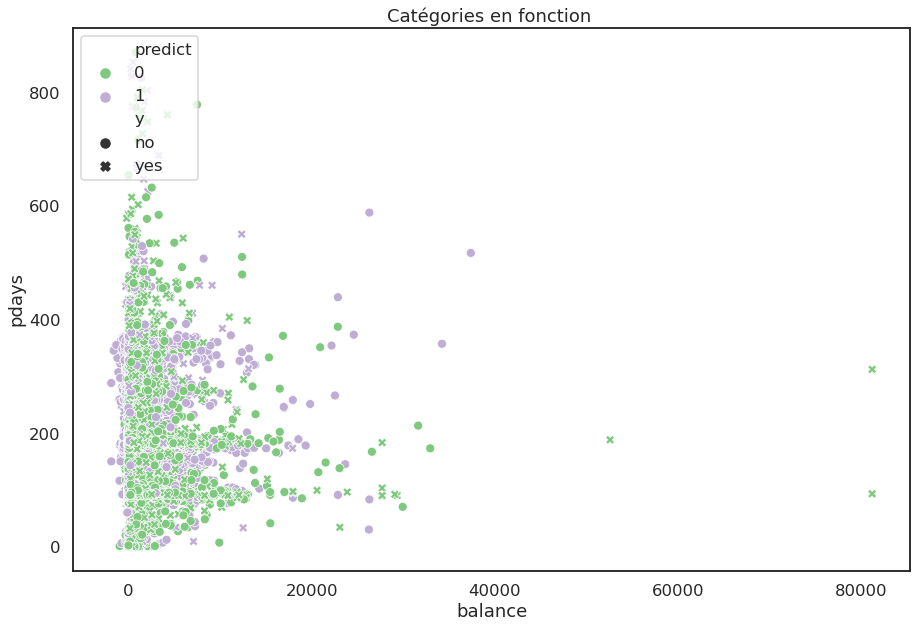

In [75]:
sns.set_style("white")
sns.set_context("talk")

plt.figure(figsize=(15,10))
plt.subplot(111)
sns.scatterplot(data=bank, x="balance", y="pdays", hue="predict",style="y", palette="Accent")

plt.title("Catégories en fonction ")
plt.legend(loc="upper left")

plt.show()
plt.close()

In [77]:
cluster = [i for i in range(1,20)]
inertie = []

for i in cluster:
    k = i
    clustering = KMeans(n_clusters=k, random_state=42)
    clustering.fit(X)
    
    inertie.append(clustering.inertia_)

<AxesSubplot:xlabel='cluster', ylabel='inertie'>

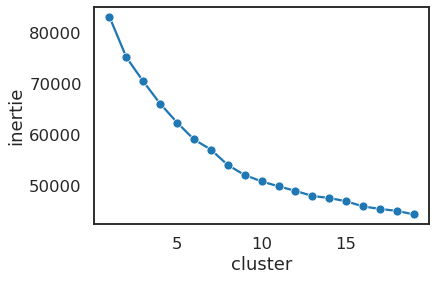

In [76]:
data = pd.DataFrame({'cluster':cluster, 'inertie':inertie})
sns.lineplot(data=data, x="cluster", y="inertie", marker='o')

In [64]:
X

array([[-0.6899209 , -0.21733462,  0.8548052 , ...,  0.        ,
         1.        ,  0.        ],
       [ 0.10779272, -0.58337213,  0.8548052 , ...,  0.        ,
         0.        ,  1.        ],
       [-0.6899209 ,  0.61330144,  0.8548052 , ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 2.85547297,  0.42071837,  0.34750164, ...,  0.        ,
         0.        ,  1.        ],
       [ 2.76683812,  1.34959124,  0.34750164, ...,  1.        ,
         0.        ,  1.        ],
       [-0.33538151,  0.45994825,  0.34750164, ...,  0.        ,
         1.        ,  0.        ]])

In [65]:
X.shape

(7842, 49)